In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [93]:
# Carga de los datos
df1 = pd.read_csv('../data/keystroke_data.csv')
df2 = pd.read_csv('../data/keystroke_data_jorge.csv')
df3 = pd.read_csv('../data/keystroke_data_jorge_test.csv')

In [94]:
def extract_data(df):
    time_data = {}
    attempts = df['attempt'].unique()

    for attempt in attempts:
        time_data['time_between_keys_attempt_'+str(attempt)] = df[df['attempt']==attempt]['timestamp']
        time_data['time_between_keys_attempt_'+str(attempt)] = list(time_data['time_between_keys_attempt_'+str(attempt)].diff().fillna(0).values)
    
    data  = [i[1:] for i in list(time_data.values())]
    df = pd.DataFrame(data,columns=['tecla_1','tecla_2','tecla_3','tecla_4','tecla_5','tecla_6','tecla_7','tecla_8','tecla_9','tecla_10','tecla_11'])


    return df

In [95]:
data1 = extract_data(df1)
data2 = extract_data(df2)
data3 = extract_data(df3)

# Etiquetado manual de los datos
data1['y'] = np.zeros(len(data1))
data2['y'] = np.ones(len(data2))
data3['y'] = np.ones(len(data3))

df = pd.concat([data1,data2,data3],axis=0)
df

,tecla_1,tecla_2,tecla_3,tecla_4,tecla_5,tecla_6,tecla_7,tecla_8,tecla_9,tecla_10,tecla_11,y
0,0.071363,0.139884,0.082787,0.109803,0.090845,0.175198,0.070994,0.100003,0.081004,0.161244,0.095009,0.0
1,0.071539,0.143534,0.070614,0.181013,0.070993,0.282007,0.087003,0.089002,0.070664,0.134271,0.091921,0.0
2,0.070997,0.143755,0.072264,0.110359,0.091707,0.183996,0.081002,0.151625,0.085555,0.192004,0.066007,0.0
3,0.116001,0.108550,0.070982,0.080003,0.111000,0.130003,0.075011,0.135996,0.074005,0.191042,0.119998,0.0
4,0.101999,0.144212,0.081118,0.100682,0.100852,0.169358,0.055292,0.140579,0.081002,0.120007,0.105997,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.072227,0.191654,0.080900,0.064133,0.081776,0.150467,0.071430,0.204520,0.071572,0.180353,0.071105,1.0
6,0.072000,0.194409,0.081753,0.039167,0.071151,0.149859,0.065982,0.199998,0.072001,0.183892,0.071007,1.0
7,0.065156,0.527573,0.081406,0.069811,0.080966,0.150671,0.065736,0.199750,0.071348,0.150481,0.084491,1.0
8,0.081579,0.160148,0.081752,0.073460,0.062057,0.130466,0.060843,0.200992,0.065303,0.170144,0.080918,1.0


In [105]:
X = df.loc[:,df.columns!='y']
y = df['y']

X_train = pd.concat([X.iloc[:40],X.iloc[50:100]],axis=0).sample(frac=1,random_state=15).reset_index(drop=True)
X_test = pd.concat([X.iloc[40:50],X.iloc[100:]],axis=0).sample(frac=1,random_state=15).reset_index(drop=True)
y_train = pd.concat([y.iloc[:40],y.iloc[50:100]],axis=0).sample(frac=1,random_state=15).reset_index(drop=True)
y_test = pd.concat([y.iloc[40:50],y.iloc[100:]],axis=0).sample(frac=1,random_state=15).reset_index(drop=True)

In [109]:
y_test

0     1.0
1     1.0
2     0.0
3     0.0
4     0.0
5     0.0
6     1.0
7     1.0
8     1.0
9     0.0
10    0.0
11    1.0
12    1.0
13    0.0
14    1.0
15    1.0
16    0.0
17    0.0
18    1.0
19    0.0
Name: y, dtype: float64

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



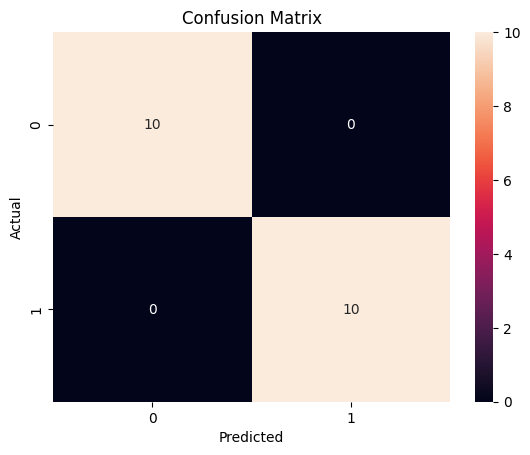

In [107]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


classifier = RandomForestClassifier(random_state=77)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()